# Assignement V: Evaluation Methodologies, Model Selection & Comparison of Models

## Evaluation Methodologies

**Download the data set https://archive.ics.uci.edu/ml/datasets/HCV+data and consider the class Blood-Donor and Non-Blood-Donor to be predicted.**

In [1]:
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# libraries
#numeric
import numpy as np
import pandas as pd
# graphics
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 


Download the data set https://archive.ics.uci.edu/ml/datasets/HCV+data

In [3]:
df = pd.read_csv("hcvdat0.csv",header = 0)
df.shape

(615, 14)

In [4]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


### 1 Eliminating samples or features with missing values
###### Deleting samples of the data frame

In [6]:
df.dropna();

###### Deleting all features with NaN

In [7]:
df.dropna(axis=1);

### 2 perform imputation

In [8]:
from sklearn.impute import SimpleImputer
#print(df.shape)
## numpy array
values = df.values[:,3:13]
#print(df.values[:,3:13].shape)

# type of imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')# = 'median', ...
# Calculation (transform the dataset)
ImpDataValues = imputer.fit_transform(values)
# count the number of NaN values in each column
print('Missing: %d' % np.isnan(ImpDataValues).sum())
df.iloc[:,3:13] = ImpDataValues

Missing: 0


### 3.  Consider that the data is organized into two groups (Blood-Donor and Non-Blood-Donor)
#### encode labels and group all the non blood-donor into the same group (or skip the encode...)
**group all the non blood-donor into the same group**

In [9]:
print(df.Category.unique())
print(df.Category.value_counts())
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder() 
y = class_le.fit_transform(df['Category'].values)

df['Category'] = y 
print(df.Category.unique())
df['Category'].replace(to_replace=[1,2,3,4], value=1, inplace=True)
print(df.Category.unique())

['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64
[0 1 2 3 4]
[0 1]


# 2.Programming Exercises

## 2.1 Learn a classification model:
### • choose an evaluation methodology of your preference and comment.

### 4 Split the data

In [10]:
from sklearn.model_selection import train_test_split

X = df.values[:,3:13]
y = df['Category']
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)

### 5 Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## SVM (linear) 

In [12]:
from sklearn.svm import SVC
SVM_lin = SVC(kernel='linear', random_state=42)
SVM_lin.fit(X_train_scaled, y_train)
y_predict = SVM_lin.predict(X_test_scaled)
y_actual = y_test

acc= 0.9243243243243243
prec= 1.0
recall= 0.44
f1_res= 0.6111111111111112
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       160
           1       1.00      0.44      0.61        25

    accuracy                           0.92       185
   macro avg       0.96      0.72      0.78       185
weighted avg       0.93      0.92      0.91       185



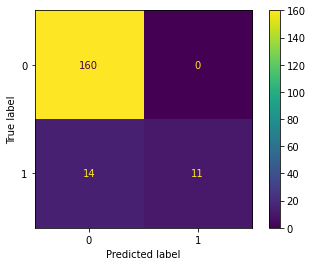

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


cm = confusion_matrix(y_actual, y_predict, labels = [0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

acc_res = accuracy_score(y_actual, y_predict)
print('acc=', acc_res)
prec_res = precision_score(y_actual, y_predict, pos_label = 1)
print('prec=', prec_res)
recall_res = recall_score(y_actual, y_predict, pos_label = 1)
print('recall=', recall_res)
f1_res = f1_score(y_actual, y_predict, pos_label = 1)
print('f1_res=', f1_res)
roc_score = roc_auc_score(y_actual, y_predict)

print(classification_report(y_actual, y_predict))

# ATTENTION: ERROR!!!!
## why????

# Use CV as evaluation strategy and train/evaluate a classifier